### Lidando com datas

Para trabalhar com séries temporais é preciso aprender a lidar com datas.

O python e o pandas são especialmente poderosos nessa área, permitindo a criação de objetos especiais que permitem operações com anos, meses, dias, minutos e segundos, respeitando diversas especificidades dos calendários. 

Isso é especialmente útil ao lidar com dados financeiros.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rc('axes', linewidth='.7', edgecolor='.7', labelcolor='.2')
plt.rc('grid', color='1')
plt.rc('axes.spines', top=False, right=False)
plt.rc('xtick', color='.4')
plt.rc('ytick', color='.4')

In [4]:
ipca = pd.read_excel('dados/ibge_ipca.xlsx', skiprows=4, skip_footer=1) # descarta as primeiras 4 linhas e a última
ipca = ipca.T                                                           # transpõe os dataframe (linhas viram colunas)  
ipca = ipca[12:]                                                        # descarta as primeiras onze linhas
ipca.index = pd.date_range(start='1980-12', end='2017-10', freq='M')    # transforma o índice do dataframe em meses
ipca.columns = ['ipca']                                                 # renomeia a coluna

selic = pd.read_excel('dados/ipeadata_selic.xls')
selic.columns = ['data', 'selic']                                       # renomeia a coluna
selic.index = pd.to_datetime(selic.data, dayfirst=True)                 # transforma o índice em data
selic = selic.resample('M').mean()                                      # transforma os dados de dias para meses
selic = selic[:'2017-09']                                               # descarta os dados posteriores a setembro

df = pd.merge(ipca, selic, left_index=True, right_index=True)           # mescla os dois dataframes 
df.ipca = df.ipca.astype('float')                                       # transforma o ipca em float 

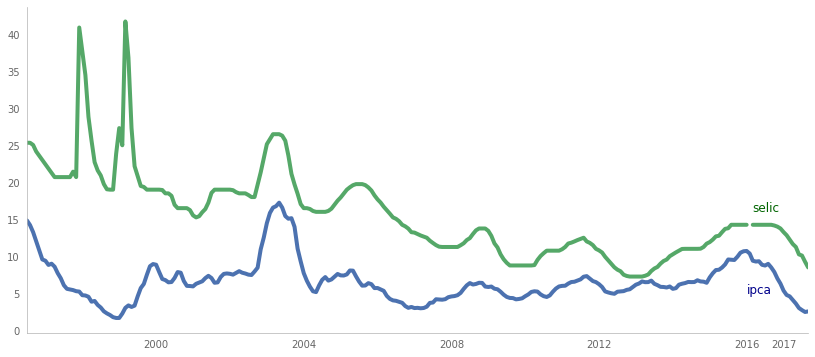

In [25]:
ax = df.plot(figsize=(14, 6), linewidth=4, legend=False)
plt.xlabel('')
plt.annotate('selic', ('2016-03', 16), color='darkgreen')
plt.annotate('ipca', ('2016', 5), color='darkblue')
plt.xticks(['2000', '2004', '2008', '2012', '2016', '2017'], [2000, 2004, 2008, 2012, 2016, 2017]);

A correlação entre as duas taxa no período todo não é alta:

In [19]:
df.corr()

,ipca,selic
ipca,1.000000,0.315184
selic,0.315184,1.000000


Porém, se são retirados os períodos onde aconteceram os dois maiores picos da taxa selic, a correlação torna-se bastante alta.

In [16]:
df['2000-12':].corr()

,ipca,selic
ipca,1.000000,0.693561
selic,0.693561,1.000000
